In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Perkalian Konvolusi

## Perkalian konvolusi menggunakan for loop

In [2]:
A = np.random.rand(5, 5)
B = np.random.rand(3, 3)

C = np.zeros((5, 5))
for i in range(1 ,A.shape[0] - 1):
    for j in range(1 ,A.shape[1] - 1):
        C[i, j] = np.sum(B * A[i-1:i+2, j-1:j+2])

print('Matriks A = \n', A)
print('Matriks B = \n', B)
print('Hasil perkalian = \n', C)

Matriks A = 
 [[0.22373142 0.79126971 0.19291507 0.56032484 0.2844936 ]
 [0.190237   0.98242964 0.21639751 0.40006456 0.4553548 ]
 [0.78863917 0.34683446 0.91221356 0.92309123 0.47778222]
 [0.58953603 0.71878416 0.75370147 0.95944724 0.77153152]
 [0.34024763 0.95976788 0.46726718 0.50403666 0.9154326 ]]
Matriks B = 
 [[0.64116623 0.10818156 0.40804531]
 [0.0948167  0.15428213 0.3106799 ]
 [0.0710804  0.43887178 0.79222594]]
Hasil perkalian = 
 [[0.         0.         0.         0.         0.        ]
 [0.         1.47555915 2.16396697 1.37257489 0.        ]
 [0.         1.68270765 2.41893402 1.83105368 0.        ]
 [0.         2.13192884 1.85284465 2.31853762 0.        ]
 [0.         0.         0.         0.         0.        ]]


+ Line 1: Membuat array A dengan nilai random dari 0 sampai 9 dan ukuran 5x5
+ Line 2: Membuat  array B dengan nilai random dari 0 sampai 9 dan ukuran 3x3
+ Line 5: Membuat array penampun hasil perkalian konvolusi bernama array C dengan ukuran 5x5
+ Line 6-8: Melakukan perkalian konvolusi dengan cara mengiterasi tiap tiap elemen array A, kecuali bagian tepi. Bagian tepi ini di abaikan untuk mempermudah proses perkalian. Tiap elemen A diambil 1 elemen disekelilingnya lalu dikalikan dengan matrik B. Hasil dari perkalian dijumlahkan lalu disimpan dalam array C.

Dari algoritma perkalian konvolusi di atas dibuat fungsi conv() untuk mempermudah proses selanjutnya

In [3]:
def conv(A, B):
    C = np.zeros_like(A)

    for i in range(1 ,A.shape[0] - 1):
        for j in range(1 ,A.shape[1] - 1):
            C[i, j] = np.sum(B * A[i-1:i+2, j-1:j+2])

    return C

Selain menggunakan cara manual, kita juga bisa menggunakan fungsi yang terdapat pada library OpenCV yaitu filter2D. Berikut conntoh dari penggunaannya:

In [4]:
D = cv2.filter2D(A, -1, B)
print('Hasil menggunakan cv2.filter2D = \n', D)

Hasil menggunakan cv2.filter2D = 
 [[2.33835899 1.13589988 1.57716978 1.11266045 1.28533609]
 [1.92767085 1.47555915 2.16396697 1.37257489 1.85774984]
 [2.19293144 1.68270765 2.41893402 1.83105368 2.08393727]
 [1.80953713 2.13192884 1.85284465 2.31853762 2.36518691]
 [2.13887196 2.04326125 2.39555051 2.39421235 2.60264895]]


# Filter Turunan Pertama Citra (Low Pass Filter)

Sebelum melakukan proses filtering low pass filter, kita perlu memuat citra terlebih dahulu dengan menggunakan imread(). Untuk mempermudah perhitungan perkalian konvolusi secara manual, citra diubah menjadi grayscale.

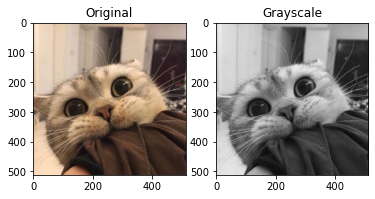

In [5]:
image = cv2.imread('cat.jpg')
image = cv2.resize(image, (512, 512))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))
plt.title('Grayscale')
plt.show()


Di bawah ini merupakan contoh kernel dari low pass filter.

In [6]:
lp = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]])

## Low pass filter dengan menggunakan for loop

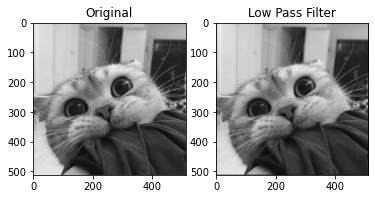

In [7]:
grayDouble = np.double(gray)

imgLp = conv(grayDouble, lp)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(np.array(imgLp, dtype='uint8'), cv2.COLOR_GRAY2RGB))
plt.title('Low Pass Filter')
plt.show()

+ Line 1: Tipe array citra diubah dari uint8 menjadi double karena kernel low pass filter bernilai desimal.
+ Line 2: Dilakukan perkalian konvolusi antara citra dengan kernel low pass menggunakan fungsi conv() yang sebelumay telah dibuat
+ Line 5-7: Gambar asli ditampilkan dengan menggunakan matplotlib imshow()
+ Line 8-10: Kernel low pass filter ditampilkan dengan menggunakan matplotlib imshow()
+ Line 9: Sebelum hasil low pass filter ditampilkan, array hasil low pass filter diubah kembali menjadi uint8.

## Low pass filter dengan menggunakan filter2D

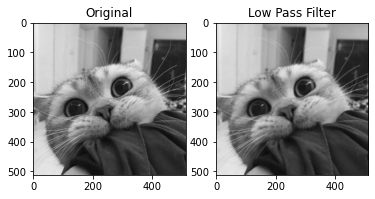

In [8]:
imgLp = cv2.filter2D(gray, -1, lp)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imgLp, cv2.COLOR_GRAY2RGB))
plt.title('Low Pass Filter')
plt.show()

# High pass filter

Di bawah ini merupakan contoh kernel dari high pass filter.

In [9]:
hp = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

## High pass filter dengan menggunakan for loop

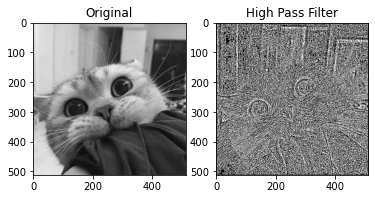

In [10]:
imgHp = np.zeros_like(gray)

imgHp = conv(gray, hp)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imgHp, cv2.COLOR_GRAY2RGB))
plt.title('High Pass Filter')
plt.show()

Dilakukan cara yang sama dengan low pass filter, hanya saja pada proses ini menggunakan kernel high pass filter dan citra array tidak perlu diubah menjadi double karena kernel yang digunakan tidak berbentuk desimal.

## High pass filter dengan menggunakan filter2D

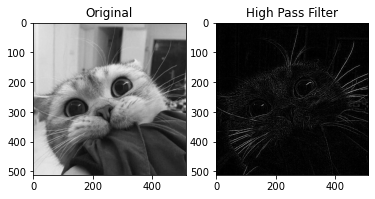

In [11]:
imgHp = cv2.filter2D(gray, -1, hp)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imgHp, cv2.COLOR_GRAY2RGB))
plt.title('High Pass Filter')
plt.show()

# Filter Sharpen

Di bawah ini merupakan contoh kernel dari sharpen.

In [12]:
sh = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

## Sharpening citra dengan menggunakan for loop

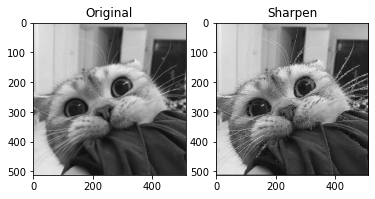

In [13]:
imgSh = np.zeros_like(gray)

imgSh = conv(gray, sh)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imgSh, cv2.COLOR_GRAY2RGB))
plt.title('Sharpen')
plt.show()

## Sharpening citra dengan menggunakan filter2D

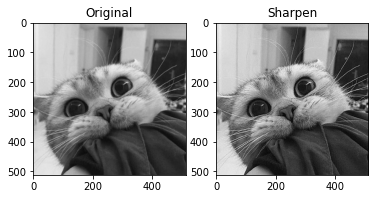

In [14]:
imgSh = cv2.filter2D(gray, -1, sh)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imgSh, cv2.COLOR_GRAY2RGB))
plt.title('Sharpen')
plt.show()

# Implemetasi Low Pass Filter, High Pass Filter, dan Sharpen pada Video

In [15]:
video = cv2.VideoCapture(1)

while True:
    _, frame = video.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    imgLp = cv2.filter2D(gray, -1, lp)
    imgHp = cv2.filter2D(gray, -1, hp)
    imgSh = cv2.filter2D(gray, -1, sh)
    
    cv2.imshow('Original Gray', frame)
    cv2.imshow('Low Pass', imgLp)
    cv2.imshow('High Pass', imgHp)
    cv2.imshow('Sharpen', imgSh)

    if cv2.waitKey(10) == ord('q'):
        break                   


video.release()
cv2.destroyAllWindows()

+ Line 1: Memuat video dari camera menggunakan VideoCapture()
+ Line 4: Membaca tiap frame dari video dengan menggunakan read()
+ Line 6: Mengubah citra menjadi grayscale dengan menggunakan cvtColor()
+ Line 8: Melakukan perkalian konvolusi antara citra dengan kernel low pass filter menggunakan filter2D()
+ Line 9: Melakukan perkalian konvolusi antara citra dengan kernel high pass filter menggunakan filter2D()
+ Line 11-13: Menampilkan citra asli, hasil low pass, dan hasil high pass filter

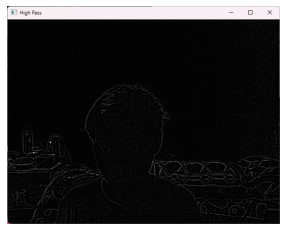

In [16]:
plt.axis('off')
plt.imshow(cv2.cvtColor(cv2.imread('highpass.png'), cv2.COLOR_BGR2RGB))
plt.show()